# Tutorial 2 - Covariance and Principle Components

In this tutorial we will get some experience with estimating the covariance matrix and finding principle components of some data. You will also get some experience manipulating matrices in python.

An estimator for the covariance matrix between variables $x$ and $y$ is
\begin{align}
{\hat{C}}_{xy} = \frac{1}{N-1} \sum_{i=1}^N \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align}



You will need to import numpy, matplotlib.pyplot and pandas


1) Read file homework_01_2d-datafile.csv into a dataframe using pandas

Make a scatter plot of X vs Y.
 

2.9942741338059755 6.478645702307186
this set of data appear to be already correlated
a best fit line has been drawn to better indicate a possible correlation


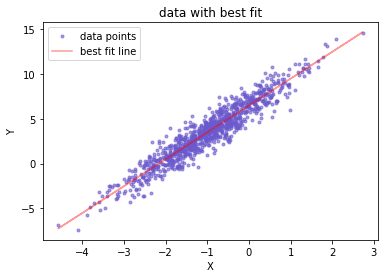

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

data = pd.read_csv('homework_01_2d-datafile.csv')

x= np.array(data['X'])
y= np.array(data['Y'])

plt.title('data with best fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,y, linestyle='none', marker='o', markersize=3, color='slateblue', alpha=.6,
label='data points')

#creazione retta best fit
m,l = np.polyfit(x,y,1)
print(m,l)

plt.plot(x, m*x + l, label='best fit line', color='red', alpha=.4)
plt.legend()

print('this set of data appear to be already correlated')
print('a best fit line has been drawn to better indicate a possible correlation')

 2) Find the covariance matrix for the two variables.  Don't use the 
 function numpy.cov(), write your own function this first time.   



In [2]:

# Print the covariance matrix C for X and Y.

data_array = np.array([x,y])

def covariance(x):
    #begin by creatin a diagonal matrix 
    matrix=np.identity(len(x[:,0]))
   
    #fill the matrix
    for k in range(len(x[:,0])):
        for j in range(len(x[:,0])):
           
            var1=np.sum(x[k,:])*(1/len(x[k,:]))
            var2=np.sum(x[j,:])*(1/len(x[j,:]))

            matrix[k,j]=1/(len(x[k,:])-1)*(np.sum((x[k,:]-var1)*(x[j,:]-var2)))
            if matrix[k,j] < 1e-10:
                matrix[k,j] = 0.
                    
    return matrix



C = covariance(data_array)


     
def var(x):
    mean = 1/(len(x))*np.sum(x)
    variance = 1/(len(x))*((np.sum((x-mean)**2)))
    return variance

print('the variance of x is:',var(x))
print()
print('the variance of y is:', var(y))

print()


print('the covariance matrix for x and y is:')
print(C)




the variance of x is: 1.0488662995708324

the variance of y is: 10.431882486077598

the covariance matrix for x and y is:
[[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]


3) Find the percision matrix and print it.

In [3]:

print('we can invert the matrix only if determinat is not 0')
print('det=', np.linalg.det(C))


print()
print('the inverse is of our covariance matrix is:')

inv_cov = np.linalg.inv(C)
print(inv_cov)


       



we can invert the matrix only if determinat is not 0
det= 1.0804840280498782

the inverse is of our covariance matrix is:
[[ 9.6644879  -2.90956357]
 [-2.90956357  0.97170915]]


The normalized covariance coefficients are
\begin{align}
\rho_{ij} = \frac{\hat{C}_{ij} }{\sqrt{\hat{C}_{ii} \hat{C}_{jj} }}
\end{align}

If the off-diagonal components of this matrix are measures of correlations.

 4) Consider the following code:
 
    D = np.diag(C)
    
    print D
    
    M =  np.outer(D,D)
    
    print M

 Use it to efficiently calculate the normalized covariance matrix and print it.


In [4]:

#test
D=np.diag(C)
M=np.outer(D,D)

print(D)
print()
print(M)

[ 1.04991622 10.44232481]

[[  1.10232406  10.96356615]
 [ 10.96356615 109.04214746]]


In [5]:
#np.outer compute the outer product of two vectors

#FIRST METHOD
rho = np.zeros((2,2))
for i in range(2): 
    for j in range(2):       
        rho[i,j]=C[i,j]/(np.sqrt(C[i,i]*C[j,j]))


print('correlation matrix with I method:')
print(rho)
print()

#SECOND METHOD USING A FUNCTION and np.outer
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation
    
print('correlation matrix with II method:')
print(correlation_from_covariance(C))


correlation matrix with I method:
[[1.         0.94944603]
 [0.94944603 1.        ]]

correlation matrix with II method:
[[1.         0.94944603]
 [0.94944603 1.        ]]


 5) Decompose the covariance (not normalized) matrix using 
    an eigenvalue decompositions.
    
    Use w,v = numpy.linalg.eig() to find the decomposition.

In [6]:

# What are the principle components (eigenvectors) of the data? 

w,u = np.linalg.eig(C)

#a,b =np.linalg.eig(data_array)

# What are the eigenvalues?
print('eigenvalues:', w)
print()
print('eigenvectors:', u)

eigenvalues: [ 0.09480059 11.39744044]

eigenvectors: [[-0.95681567 -0.29069531]
 [ 0.29069531 -0.95681567]]


 6) Transform the data into the basis of the principle components (or eigenvectors) that were found in 5).

  You can collect the data into a structure data = np.array([X,Y]) and then matrix 
  multiply it by a matrix with @ (or np.dot(,) ). You might need to transpose something...
  
numpy.shape() is useful to make sure your doing matrix multiplications correctly.





change of basis matrix:
[[-0.95681567  0.29069531]
 [-0.29069531 -0.95681567]]

(2, 1000)


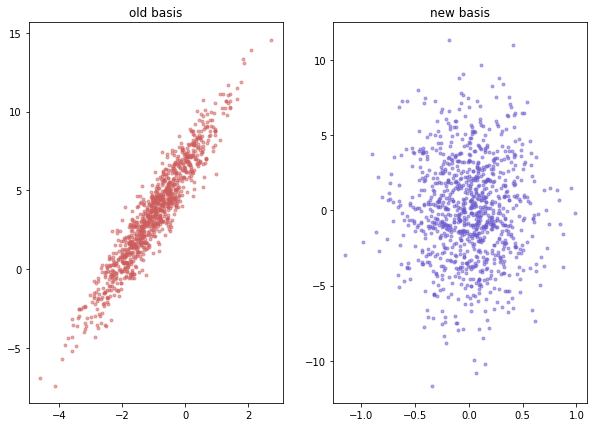

covariance matrix in new basis:
[[ 0.09480059  0.        ]
 [ 0.         11.39744044]]

associated correlation matrix
[[1. 0.]
 [0. 1.]]


In [7]:


u=np.array([u[0],u[1]])
u=u.transpose()



print('change of basis matrix:')
print(u)
print()
#print(np.shape(data_array))

#in order to center in (0,0)
x1=np.zeros(len(x))
y1=np.zeros(len(x))

for k in range(len(x)):
    x1[k]=x[k]-np.mean(x)
    y1[k]=y[k]-np.mean(y)

data_array2 = np.array([x1,y1])

#matrice del cambiamento di base = u
dat2=np.zeros((2,1000))
print(np.shape(dat2))

for i in range(len(x)):
    dat2[:,i]=u@data_array2[:,i]

    


#make a scatter plot of the data in this basis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax[0].plot(data_array[0],data_array[1],marker='o',markersize=3, linestyle='none',color='indianred', alpha=.5)
ax[0].set_title('old basis')
ax[1].plot(dat2[0],dat2[1], marker='o',markersize=3, linestyle='none', color='slateblue', alpha=.5)
ax[1].set_title('new basis')

plt.show()
#print the covariance matrix of the data in this basis

C2 = covariance(dat2)
print('covariance matrix in new basis:')
print(C2)

print()
print('associated correlation matrix')
print(correlation_from_covariance(C2))


Compare the diagonal elements (variances) of the covariance matrix 
to the eigenvalues you got in part 4).  Are the variances of the principle components larger, smaller or both 
larger and smaller than the original variances?

In [8]:

print(np.diag(C2)/w)

print('from the comparison we can observe that the values on the diagonal')
print(' of the new matrix  are the old eigenvalues for the old covariance matrix')

[1. 1.]
from the comparison we can observe that the values on the diagonal
 of the new matrix  are the old eigenvalues for the old covariance matrix


 7) Do 1) through 6), but using the data file homework_01_5d-datafile.csv this time.
    In this case the data is 5 dimensional.  You can use numpy.cov() this time.
    You can't plot all those dimensions so you don't have to do the scatter plots
    ,but feel free to plot some dimensions to make sure you are getting what 
    you expect.

 The best way to find the covariance matrix is to make a 5 by 2000 array out 
 of the columns of the dataframe using numpy.array([...])

(2000, 6)

the covariance matrix is:
[[0.9528516  2.88094852 0.         0.01808025 0.        ]
 [2.88094852 9.70755876 0.         0.08729034 0.        ]
 [0.         0.         2.89654169 0.0719737  0.        ]
 [0.01808025 0.08729034 0.0719737  3.45612595 0.        ]
 [0.         0.         0.         0.         2.44235468]]

[[ 0.9528516   2.88094852 -0.06656913  0.01808025 -0.04847952]
 [ 2.88094852  9.70755876 -0.24361655  0.08729034 -0.12363643]
 [-0.06656913 -0.24361655  2.89654169  0.0719737  -0.02949331]
 [ 0.01808025  0.08729034  0.0719737   3.45612595 -1.42338742]
 [-0.04847952 -0.12363643 -0.02949331 -1.42338742  2.44235468]]

visual rapresentation of the matrix 


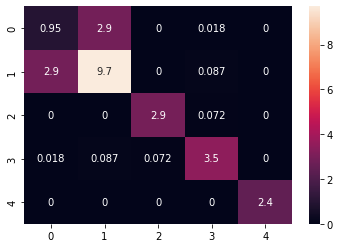


the assosiated correlation matrix is:
[[1.         0.94725706 0.         0.00996316 0.        ]
 [0.94725706 1.         0.         0.01507011 0.        ]
 [0.         0.         1.         0.02274779 0.        ]
 [0.00996316 0.01507011 0.02274779 1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
only X1 and X2 are correlated
visual rapresentetion of the correlation  matrix


<AxesSubplot:>

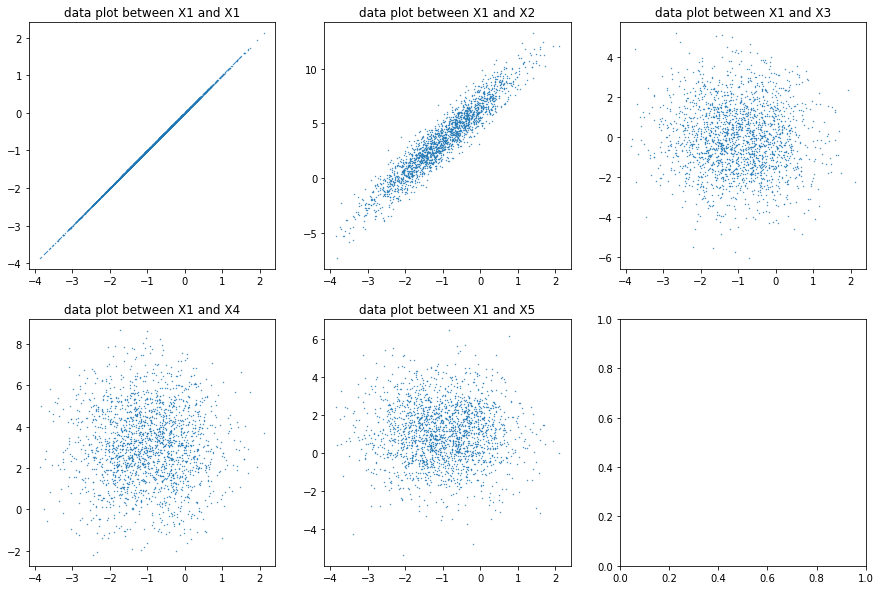

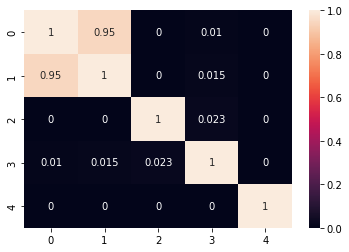

In [9]:
# Which variables seem to be correlated with each other and which ones not?
data=pd.read_csv('homework_01_5d-datafile.csv')
#print(data.head())


data1=np.array([data['X1'],data['X2'],data['X3'],data['X4'],data['X5']])
print(data.shape)
# What are the principle components (eigenvectors) of the data? 

covariance_mat = covariance(data1)

print()
print('the covariance matrix is:')
print(covariance_mat)
print()
print(np.cov(data1))

#in this case a heatmap is more helpfull to visualize the matrix
print()
print('visual rapresentation of the matrix ')
plt.figure(2)
sn.heatmap(covariance_mat, annot=True)
plt.show()

   
print()
print('the assosiated correlation matrix is:')
print(correlation_from_covariance(covariance_mat))
print('only X1 and X2 are correlated')

#try to plot the correlation between one dataset and the other
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax= ax.ravel()
for i in range(6):
    #plt.figure(k+1)
    if i==5:
        break
    ax[i].plot(data['X1'], data['X'+str(i+1)], linestyle='none', marker='o', markersize=.4)
    ax[i].set_title('data plot between X1 and X'+str(i+1))

        
   
S=correlation_from_covariance(covariance_mat)
plt.figure(3)
print('visual rapresentetion of the correlation  matrix')
sn.heatmap(S, annot=True)





In [10]:
# What are the variances along each principle component?
a,b=np.linalg.eig(covariance_mat)

print()
print('the eigenvalue of the covariance matrix are:')
print(a)
print()
print('the eigenvectors of the covariance matrix are:')
print(b)
print()


the eigenvalue of the covariance matrix are:
[10.57164656  0.08985454  3.46416006  2.88741684  2.44235468]

the eigenvectors of the covariance matrix are:
[[-2.86918519e-01 -9.57937538e-01  5.73356372e-03 -7.49993635e-04
   0.00000000e+00]
 [-9.57873673e-01  2.86967578e-01  1.12233714e-02 -1.29295157e-03
   0.00000000e+00]
 [-1.17041620e-04  5.89161225e-05 -1.25782247e-01 -9.92057866e-01
   0.00000000e+00]
 [-1.24810411e-02 -2.29749372e-03 -9.91977817e-01  1.25773434e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]]



In [11]:
print('the change of basis matrix is:')
b=np.transpose(b)
print(b)


dat3=np.zeros((5,2000))

for i in range(len(data['X1'])):
    dat3[:,i]=b@data1[:,i]

C2 = covariance(dat3)

print()
print('in the new basis the covariance matrix is:')
print(C2)
print(np.shape(C2))




the change of basis matrix is:
[[-2.86918519e-01 -9.57873673e-01 -1.17041620e-04 -1.24810411e-02
   0.00000000e+00]
 [-9.57937538e-01  2.86967578e-01  5.89161225e-05 -2.29749372e-03
   0.00000000e+00]
 [ 5.73356372e-03  1.12233714e-02 -1.25782247e-01 -9.91977817e-01
   0.00000000e+00]
 [-7.49993635e-04 -1.29295157e-03 -9.92057866e-01  1.25773434e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]]

in the new basis the covariance matrix is:
[[1.05715875e+01 1.55923498e-05 0.00000000e+00 0.00000000e+00
  1.50106565e-01]
 [1.55923498e-05 8.98538164e-02 7.72243501e-04 6.09223543e-03
  1.42291897e-02]
 [0.00000000e+00 7.72243501e-04 3.46494390e+00 3.04523135e-03
  1.41401290e+00]
 [0.00000000e+00 6.09223543e-03 3.04523135e-03 2.88669281e+00
  0.00000000e+00]
 [1.50106565e-01 1.42291897e-02 1.41401290e+00 0.00000000e+00
  2.44235468e+00]]
(5, 5)



the associated normalised matrix is:
[[1.00000000e+00 1.59982766e-05 0.00000000e+00 0.00000000e+00
  2.95410017e-02]
 [1.59982766e-05 1.00000000e+00 1.38400575e-03 1.19621193e-02
  3.03743881e-02]
 [0.00000000e+00 1.38400575e-03 1.00000000e+00 9.62879418e-04
  4.86072331e-01]
 [0.00000000e+00 1.19621193e-02 9.62879418e-04 1.00000000e+00
  0.00000000e+00]
 [2.95410017e-02 3.03743881e-02 4.86072331e-01 0.00000000e+00
  1.00000000e+00]]
from this matrix is easy to understand that no correlations are presents


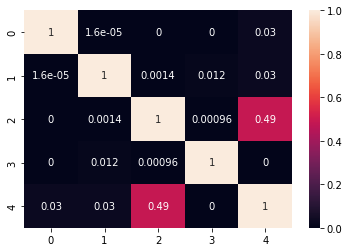

In [12]:
print()
print('the associated normalised matrix is:')
print(correlation_from_covariance(C2))

sn.heatmap(correlation_from_covariance(C2), annot=True)
print('from this matrix is easy to understand that no correlations are presents')